In [28]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

matplotlib settings set


In [29]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_of_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline


# Nway run in photometric prior mode

In [30]:
magnitude_columns = [
                    ('nnmag_grz', '../1_desi-photo-prior/model/nnmag_grz.csv'),
                    ('nnmag_grzw1', '../1_desi-photo-prior/model/nnmag_grzw1.csv'),
                    ('nnmag_grzw1w2', '../1_desi-photo-prior/model/nnmag_grzw1w2.csv'),
                    ('rel_dered_mag_g', '../1_desi-photo-prior/model/rel_dered_mag_g.csv'),
                    ('rel_dered_mag_r', '../1_desi-photo-prior/model/rel_dered_mag_r.csv'),
                    ('rel_dered_mag_z', '../1_desi-photo-prior/model/rel_dered_mag_z.csv'),
                    ('rel_dered_g_r', '../1_desi-photo-prior/model/rel_dered_g_r.csv'),
                    ('rel_dered_r_z', '../1_desi-photo-prior/model/rel_dered_r_z.csv'),
                    ('rel_dered_g_z', '../1_desi-photo-prior/model/rel_dered_g_z.csv'),
                    # 
                    ]

ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1, magnitude_columns=magnitude_columns)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl') #TODO RETURN TO VAL WITH HOSTLESS
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,'mag_include_radius': 5.0,
'store_mag_hists': True,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.656740,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.689910,1.969860e-12,NaN
2,2,b'SRGe J110537.6+585120',166.406669,58.855424,0.668180,1.505411e-12,NaN
3,3,b'SRGe J102349.9+563347',155.958041,56.563186,0.652214,1.001123e-12,NaN
4,4,b'SRGe J105057.2+593215',162.738144,59.537414,0.656779,9.137326e-13,NaN
...,...,...,...,...,...,...,...
9213,9210,b'SRGe J102315.1+561957',155.813071,56.332561,3.950350,1.637604e-15,NaN
9214,9211,b'SRGe J102332.5+562524',155.885436,56.423270,3.220603,1.608667e-15,NaN
9215,9212,b'SRGe J102235.0+561919',155.645874,56.321872,3.025501,1.595806e-15,NaN
9216,9213,b'SRGe J102223.5+562357',155.597875,56.399058,3.296691,1.532857e-15,NaN


    adding angular separation columns
matching: 145069 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:02<00:00, 3332.51it/s]
Incorporating bias "DESI:nnmag_grz" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grz"


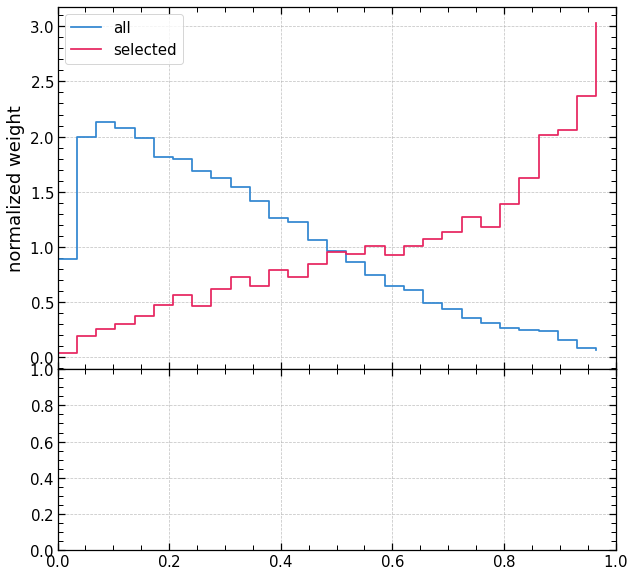

Incorporating bias "DESI:nnmag_grzw1" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1"


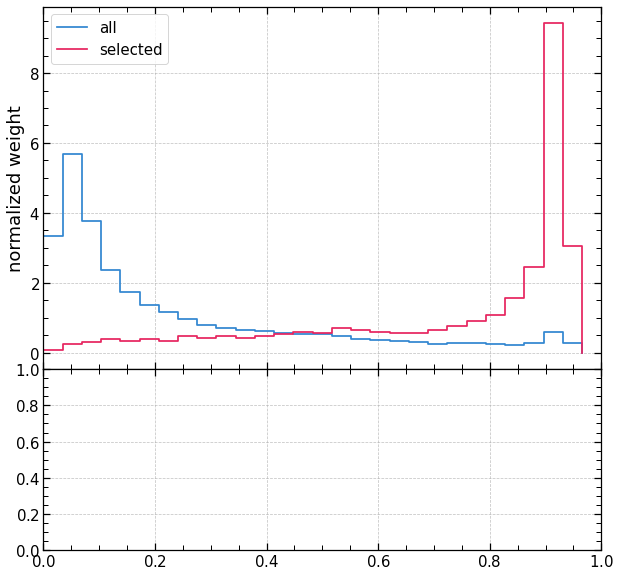

Incorporating bias "DESI:nnmag_grzw1w2" ...
magnitude histogramming: using user-supplied histogram for "DESI_nnmag_grzw1w2"


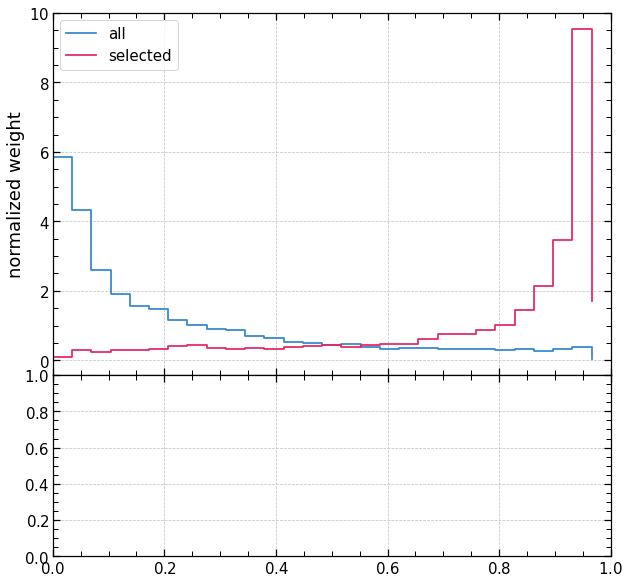

Incorporating bias "DESI:rel_dered_mag_g" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_g"


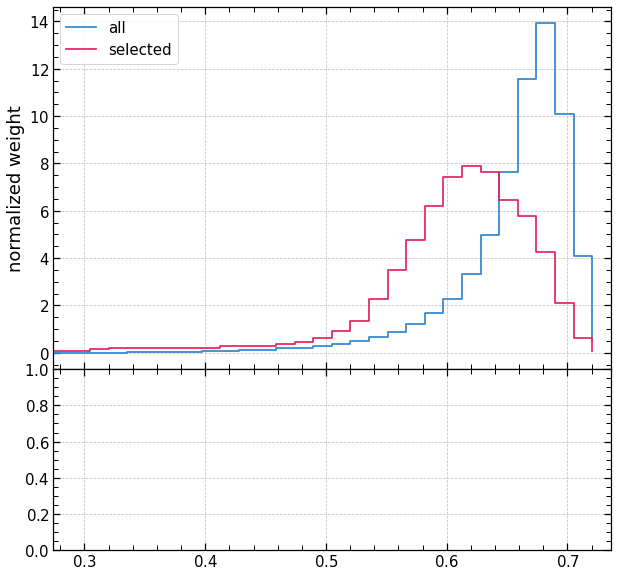

Incorporating bias "DESI:rel_dered_mag_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_r"


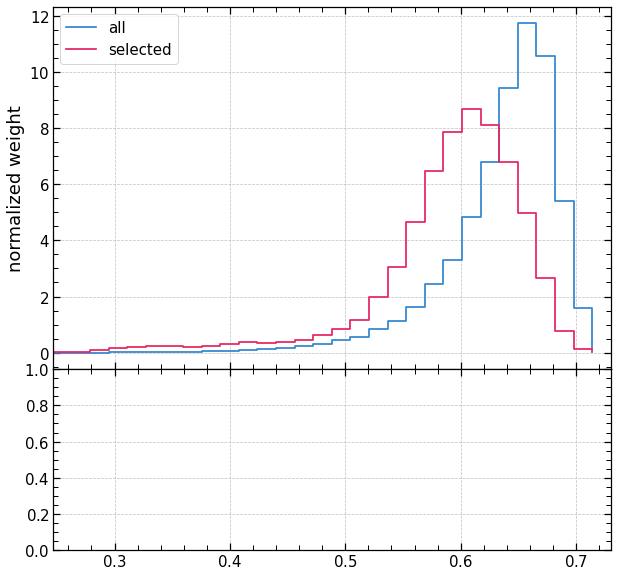

Incorporating bias "DESI:rel_dered_mag_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_mag_z"


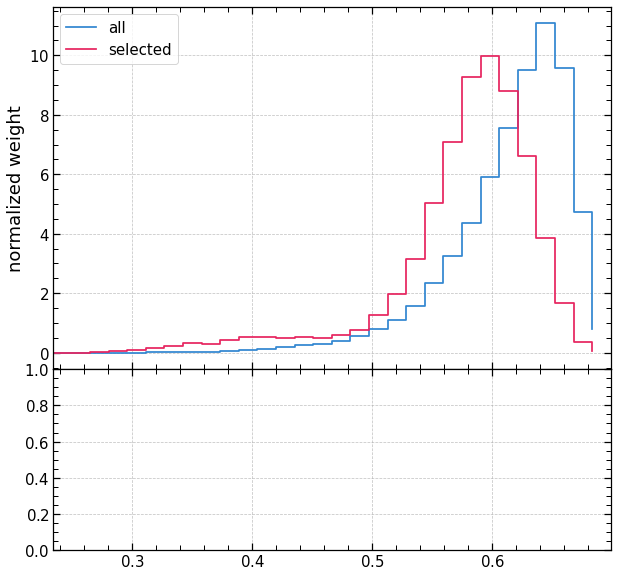

Incorporating bias "DESI:rel_dered_g_r" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_g_r"


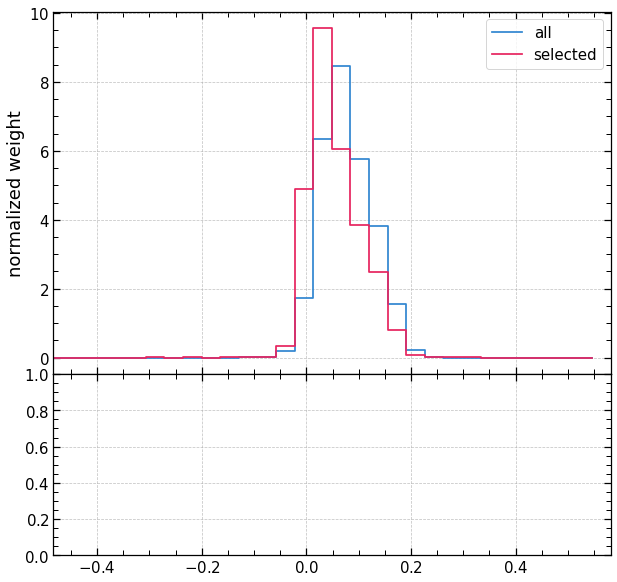

Incorporating bias "DESI:rel_dered_r_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_r_z"


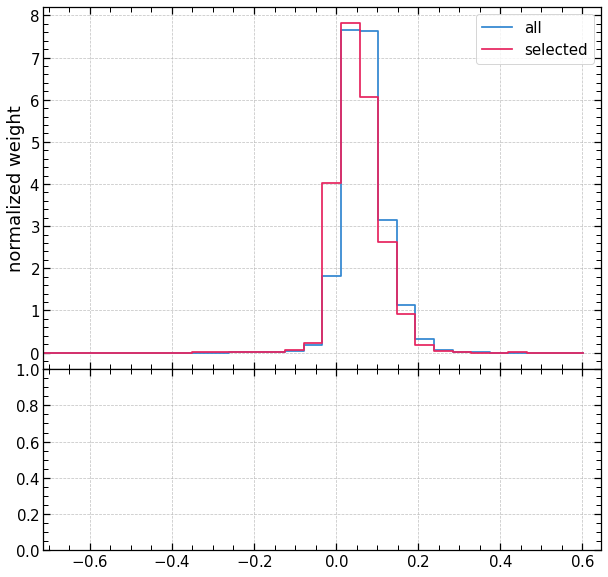

/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:376: RuntimeWarning: divide by zero encountered in log10
  weights = log10(func(magcol))
Incorporating bias "DESI:rel_dered_g_z" ...
magnitude histogramming: using user-supplied histogram for "DESI_rel_dered_g_z"


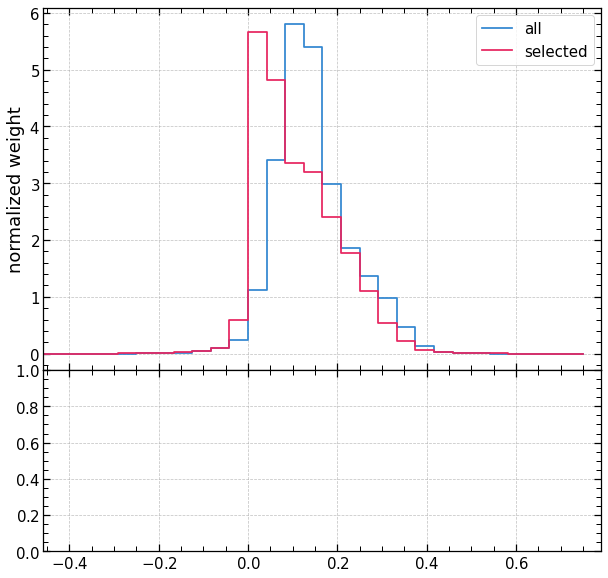


Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [31]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)


In [32]:
os.system('rm DESI*_fit.txt')

rm: DESI*_fit.txt: No such file or directory


256

In [33]:

# nway_res_ero_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#cutoffs, _, nway_purity = nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random)


In [34]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway.pkl')

In [35]:
nway_res_ero


,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,bias_DESI_nnmag_grz,bias_DESI_nnmag_grzw1,bias_DESI_nnmag_grzw1w2,bias_DESI_rel_dered_mag_g,bias_DESI_rel_dered_mag_r,bias_DESI_rel_dered_mag_z,bias_DESI_rel_dered_g_r,bias_DESI_rel_dered_r_z,bias_DESI_rel_dered_g_z,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,rel_dered_mag_g,rel_dered_mag_r,rel_dered_mag_z,rel_dered_mag_w1,rel_dered_mag_w2,rel_dered_mag_w3,rel_dered_mag_w4,rel_dered_g_r,rel_dered_r_z,rel_dered_g_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,prior_type,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grzw1,nnmag_grzw1_orig,nnmag_grz,nnmag_grz_orig,rel_dered_mag_g_orig,rel_dered_mag_r_orig,rel_dered_mag_z_orig,rel_dered_mag_w1_orig,rel_dered_mag_w2_orig,rel_dered_mag_w3_orig,rel_dered_mag_w4_orig,rel_dered_g_r_orig,rel_dered_r_z_orig,rel_dered_g_z_orig,rel_dered_z_w1_orig,rel_dered_r_w2_orig,rel_dered_w1_w2_orig,rel_dered_z_w3_orig,rel_dered_r_w4_orig,rel_dered_w3_w4_orig
0,0,10477,0.042512,0.042512,2,11.284250,11.284250,9.877265e-01,1.000000,1.000000,36.203859,1.000000,1.000000,1.000000,1.000000,1.0,1.0,9.996569e-01,1,0.999657,1.000000e+00,b'SRGe J103744.3+571156',159.434594,57.198788,0.656740,3.284168e-12,NaN,b'9011_609162_1184',159.434616,57.198786,-99.000000,-99.000000,-99.00000,-99.0,-99.0,0.407712,0.382073,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,0.134679,0.273902,0.089736,b'grzw1w2',0.967633,0.967633,-99.000000,0.932976,-99.000000,0.984407,16.058165,16.111576,15.616705,14.459218,14.227020,14.269917,13.372561,-0.053411,0.494871,0.441460,1.157487,1.884556,0.232198,1.346788,2.739015,0.897356
17,0,2289778,9.399113,9.399113,2,-32.184551,-32.184551,2.734438e-42,1.000000,1.000000,1.000000,1.000000,1.000000,0.173558,1.000000,1.0,1.0,4.745847e-43,0,0.999657,1.628883e-46,b'SRGe J103744.3+571156',159.434594,57.198788,0.656740,3.284168e-12,NaN,b'9011_609162_1223',159.439360,57.199177,-99.000000,-99.000000,0.65618,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,NaN,NaN,22.966312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,784835,9.507520,9.507520,2,-33.193072,-33.193072,2.681310e-43,1.000000,1.000000,0.836162,1.000000,1.000000,1.000000,1.000000,1.0,1.0,2.242009e-43,0,0.999657,7.695086e-47,b'SRGe J103744.3+571156',159.434594,57.198788,0.656740,3.284168e-12,NaN,b'9011_609162_1210',159.437965,57.200696,-99.000000,-99.000000,-99.00000,-99.0,-99.0,0.503986,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,0.540583,-99.000000,-99.000000,b'grzw1w2',0.480309,0.480309,-99.000000,0.671957,-99.000000,0.498988,23.338484,23.416210,23.045345,21.072514,21.045940,17.639517,NaN,-0.077726,0.370865,0.293139,1.972831,2.370270,0.026574,5.405828,NaN,NaN
12,0,1418909,10.924277,10.924277,2,-47.436515,-47.436515,1.530751e-57,1.000000,1.000000,1.000000,0.304764,0.144745,1.000000,2.801365,1.0,1.0,1.891653e-58,0,0.999657,6.492585e-62,b'SRGe J103744.3+571156',159.434594,57.198788,0.656740,3.284168e-12,NaN,b'9011_609162_1191',159.435390,57.201792,0.685364,0.687664,-99.00000,-99.0,-99.0,-99.000000,-99.000000,-0.008048,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,23.987741,24.068224,NaN,NaN,NaN,NaN,NaN,-0.080483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0,1123493,13.104032,13.104032,2,-73.208244,-73.208244,2.589256e-83,1.000000,1.000000,0.014527,1.000000,1.000000,1.000000,1.000000,1.0,1.0,3.761354e-85,0,0.999657,1.290983e-88,b'SRGe J103744.3+571156',159.434594,57.198788,0.656740,3.284168e-12,NaN,b'9011_609162_1232',159.440651,57.200364,-99.000000,-99.000000,-99.00000,-99.0,-99.0,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.0,-99.0,-99.0,-99.000000,-99.000000,-99.000000,b'grzw1w2',0.021530,0.021530,-99.

 Completeness = 95% 
 Purity = 95% 
 prob_has_match optimal cutoff =  0.26 
 Fraction of sources with prob_has_match > 0.26 = 81%


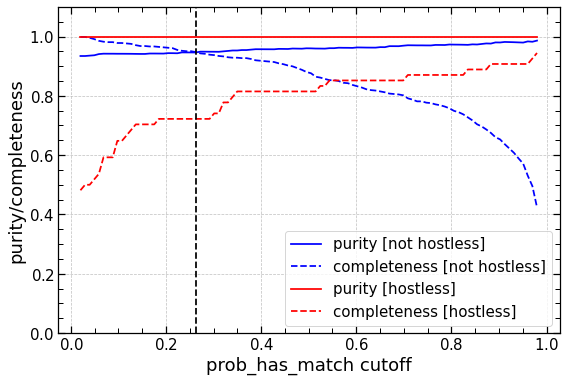

 NOT HOSTLESS 
assigned NOT HOSTLESS: 650
assigned NOT HOSTLESS with correct match: 615
total: 686
purity [assigned NOT HOSTLESS correctly / all NOT HOSTLESS]: 0.9461538461538461
completeness [all NOT HOSTLESS / total NOT HOSTLESS]: 0.9475218658892128
 HOSTLESS 
assigned HOSTLESS: 39
assigned HOSTLESS correctly: 39
total HOSTLESS: 54
purity [assigned HOSTLESS correctly / all assigned HOSTLESS]: 1.0
completeness [all HOSTLESS assigned / total HOSTLESS]: 0.7222222222222222


In [36]:
assess_goodnes_of_cross_match(nway_res_ero);